In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the dataset
from tqdm import tqdm
tqdm.pandas()

from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
df = pd.read_csv('IMDBDataset.csv')

Saving IMDBDataset.csv to IMDBDataset.csv


In [25]:
# Displaying the first few rows of the dataset
df.head()

,Uniqueid,Location,review,sentiment,income,processed_review,location_encoded,location_income_cluster,location_text
0,1,Asia,One of the other reviewers has mentioned that ...,positive,15013.0,one reviewer mentioned watching oz episode hoo...,3,2,Asia
1,2,Africa,A wonderful little production. <br /><br />The...,positive,53413.0,wonderful little production br br filming tech...,0,1,Africa
2,3,America,I thought this was a wonderful way to spend ti...,positive,47356.0,thought wonderful way spend time hot summer we...,1,1,America
3,4,Europe,Basically there's a family where a little boy ...,negative,87197.0,basically family little boy jake think zombie ...,4,0,Europe
4,5,Antartica,"Petter Mattei's ""Love in the Time of Money"" is...",positive,25876.0,petter mattei love time money visually stunnin...,2,2,Antartica


In [26]:
# Step 2: Data Preprocessing
# Checking for missing values
df.isnull().sum()

# Droping any rows with missing values
df.dropna(inplace=True)

In [27]:
# Step 3: Text Preprocessing

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizing the text
    words = word_tokenize(text.lower())
    # Removing stop words and non-alphabetic tokens, and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

# Applying the preprocessing to the reviews
df['processed_review'] = df['review'].apply(preprocess_text)


In [28]:
# Step 4: Feature Engineering

# Converting text data to numerical data using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_review']).toarray()

# Encoding the target variable
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Step 5: Model Building

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [30]:
# Step 6: Model Evaluation

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8512
Confusion Matrix:
 [[4185  776]
 [ 712 4327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [31]:
# Step 7: Taking user Input for Sentiment Analysis

def preprocess_new_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Remove stop words and non-alphabetic tokens, and lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [32]:
def predict_sentiment(text):
    # Preprocessing the text
    processed_text = preprocess_new_text(text)
    # Transforming the text to match the TF-IDF vectorizer
    text_features = vectorizer.transform([processed_text]).toarray()
    # Predicting the sentiment
    prediction = model.predict(text_features)
    # Maping the prediction to sentiment label
    sentiment = 'positive' if prediction[0] == 1 else 'negative'
    return sentiment


In [33]:
# Example of the function
new_review = "I absolutely loved this movie. The storyline was gripping and the characters were very well developed."
predicted_sentiment = predict_sentiment(new_review)
print("Review:", new_review)
print("Predicted Sentiment:", predicted_sentiment)


Review: I absolutely loved this movie. The storyline was gripping and the characters were very well developed.
Predicted Sentiment: positive


In [34]:
# Testing own reviews
user_review = input("Enter a movie review: ")
user_sentiment = predict_sentiment(user_review)
print("Predicted Sentiment for your review:", user_sentiment)

Enter a movie review: Kind of drawn in by the erotic scenes, only to realize this was one of the most amateurish and unbelievable bits of film I've ever seen. Sort of like a high school film project. What was Rosanna Arquette thinking?? And what was with all those stock characters in that bizarre supposed Midwest town? Pretty hard to get involved with this one. No lessons to be learned from it, no brilliant insights, just stilted and quite ridiculous (but lots of skin, if that intrigues you) videotaped nonsense....What was with the bisexual relationship, out of nowhere, after all the heterosexual encounters. And what was with that absurd dance, with everybody playing their stereotyped roles? Give this one a pass, it's like a million other miles of bad, wasted film, money that could have been spent on starving children or Aids in Africa.....
Predicted Sentiment for your review: negative


In [35]:
# Testing own reviews
user_review = input("Enter a movie review: ")
user_sentiment = predict_sentiment(user_review)
print("Predicted Sentiment for your review:", user_sentiment)

Enter a movie review: I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it.
Predicted Sentiment for your review: positive


In [36]:
# Step 8: K-Means Clustering

# Assuming 'Location ' and 'income' are numeric or categorical variables that can be encoded
if df['Location '].dtype == 'object':
    df['location_encoded'] = df['Location '].astype('category').cat.codes

# Applying K-Means clustering on location and income
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['income'] = df['income'].astype(float)  # Ensure income is float
df['location_income_cluster'] = kmeans.fit_predict(df[['location_encoded', 'income']])


In [37]:
# Converting 'location_encoded' back to original categorical values for plotting
df['location_text'] = df['Location ']

# Creating a dictionary to map encoded locations to original location names
location_dict = df[['location_encoded', 'location_text']].drop_duplicates().set_index('location_encoded').to_dict()['location_text']


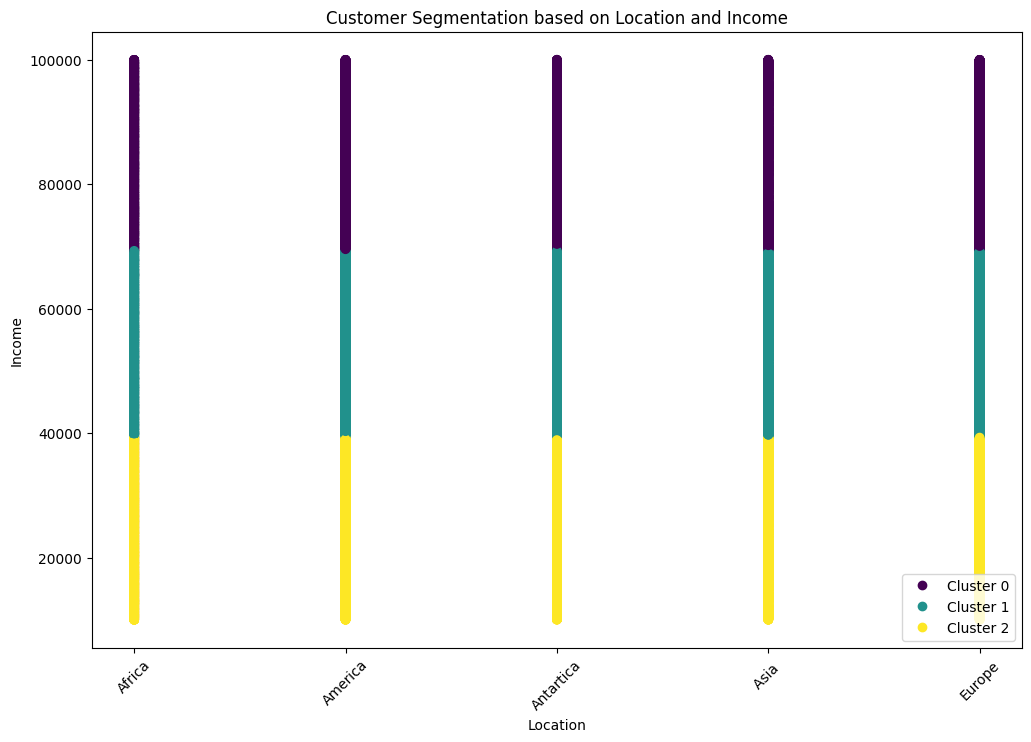

In [38]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['location_encoded'], df['income'], c=df['location_income_cluster'], cmap='viridis')
plt.xlabel('Location')
plt.ylabel('Income')
plt.title('Customer Segmentation based on Location and Income')

# Seting x-ticks to show actual location names
plt.xticks(ticks=list(location_dict.keys()), labels=list(location_dict.values()), rotation=45)

# Adding legend for the clusters
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [39]:
# Displaying the first few rows with the new clusters
df.head()

,Uniqueid,Location,review,sentiment,income,processed_review,location_encoded,location_income_cluster,location_text
0,1,Asia,One of the other reviewers has mentioned that ...,positive,15013.0,one reviewer mentioned watching oz episode hoo...,3,2,Asia
1,2,Africa,A wonderful little production. <br /><br />The...,positive,53413.0,wonderful little production br br filming tech...,0,1,Africa
2,3,America,I thought this was a wonderful way to spend ti...,positive,47356.0,thought wonderful way spend time hot summer we...,1,1,America
3,4,Europe,Basically there's a family where a little boy ...,negative,87197.0,basically family little boy jake think zombie ...,4,0,Europe
4,5,Antartica,"Petter Mattei's ""Love in the Time of Money"" is...",positive,25876.0,petter mattei love time money visually stunnin...,2,2,Antartica


In [40]:
print("Besides being boring, the scenes were oppressive and dark. The movie tried to portray some kind of moral, but fell flat with its message. What were the redeeming qualities?? On top of that, I don't think it could make librarians look any more unglamorous than it did.")

Besides being boring, the scenes were oppressive and dark. The movie tried to portray some kind of moral, but fell flat with its message. What were the redeeming qualities?? On top of that, I don't think it could make librarians look any more unglamorous than it did.
